# airbnb price_predict_test_quest

## 1. BaseLine

In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv('/content/drive/MyDrive/on6Core/Quest_python/train.csv')
test = pd.read_csv('/content/drive/MyDrive/on6Core/Quest_python/test.csv')

## 2. EDA

In [2]:
# 데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

In [3]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [4]:
# 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [5]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [6]:
# 결측치(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<Axes: >

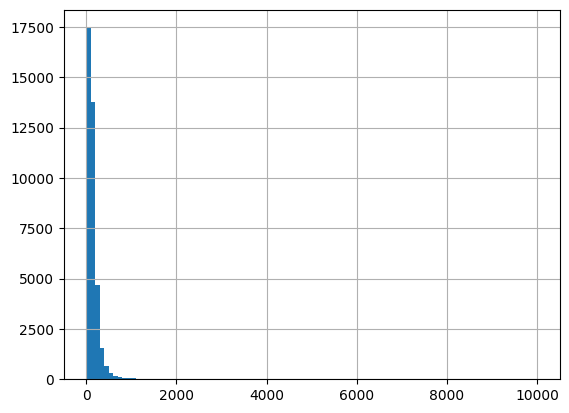

In [7]:
# target(hist)
train['price'].hist(bins=100)

<Axes: >

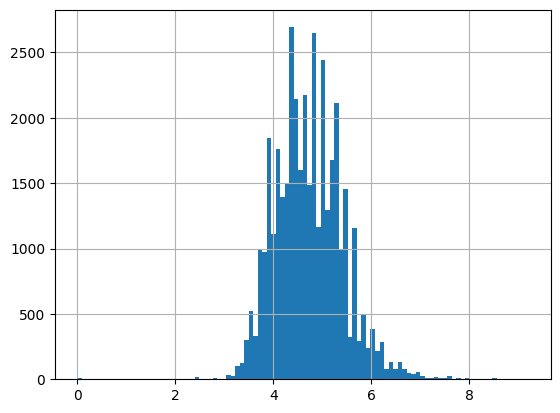

In [8]:
train['price'] = np.log1p(train['price'])
train['price'].hist(bins=100)

In [9]:
# target(describe)
train['price'].describe()

count    39116.000000
mean         4.737628
std          0.694731
min          0.000000
25%          4.248495
50%          4.663439
75%          5.170484
max          9.210440
Name: price, dtype: float64

In [10]:
# 피처(host_id)
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

## 3. 데이터 전처리

In [11]:
# 결측치 컬럼 삭제(last_review)
train = train.drop(columns=['last_review'], axis=1)
test = test.drop(columns=['last_review'], axis=1)

In [12]:
# 결측치 채우기
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [13]:
# 결측치 확인
train.isnull().sum()

id                                 0
name                              12
host_id                            0
host_name                         17
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [14]:
# 가격 값 복사 후 train에서 분리
target = train['price']
train = train.drop('price', axis=1)

1. train / test
2. train - train / target   
   test

In [15]:
# 수치형 피처 선택
# 수치형 데이터와 범주형 데이터 분리
n_train = train.select_dtypes(exclude='object').copy()
c_train = train.select_dtypes(include='object').copy()
n_test = test.select_dtypes(exclude='object').copy()
c_test = test.select_dtypes(include='object').copy()

In [16]:
train.info()
#  host_id   int64
#  latitude  float64
#  7   longitude  float64
#  10  minimum_nights  int64
#  11  number_of_reviews  int64
#  13  reviews_per_month  float64
#  14  calculated_host_listings_count  int64
#  availability_365  int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   minimum_nights                  39116 non-null  int64  
 10  number_of_reviews               39116 non-null  int64  
 11  reviews_per_month               39116 non-null  float64
 12  calculated_host_listings_count  

In [17]:
# 수치형 변수
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = [
        'host_id',
        'latitude',
        'longitude',
        'minimum_nights',
        'number_of_reviews',
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365'
        ]

n_train[cols] = scaler.fit_transform(n_train[cols])
n_test[cols] = scaler.transform(n_test[cols])
#display(n_train.head(1))

In [18]:
n_train = n_train.drop('id', axis=1)
n_test = n_test.drop('id', axis=1)

In [19]:
# 범주형 변수
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = [
        'neighbourhood_group',
        'neighbourhood',
        'room_type'
        ]

for col in cols:
    c_train[col] = le.fit_transform(c_train[col])
    c_test[col] = le.transform(c_test[col])

#display(c_train.head(1))

In [20]:
# object remove
del_cols =['name','host_name']
c_train = c_train.drop(del_cols, axis=1)
c_test = c_test.drop(del_cols, axis=1)

In [21]:
# 분리한 데이터 다시 합침
train = pd.concat([n_train, c_train], axis=1)
test = pd.concat([n_test, c_test], axis=1)
#train.head(2)

## 4. 검증 데이터 분리

### Train

In [22]:
# X_train : 모델 학습용 데이터 (독립변수)
# X_val : 모델 검증 시  데이터 (독립변수)
# y_train : 학습용 데이터로 훈련된 모델 정답 데이터 (종속변수)
# y_val : 모델 검증 시  데이터 (종속변수)
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 11), (7824, 11), (31292,), (7824,))

In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31292 entries, 16787 to 21373
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         31292 non-null  float64
 1   latitude                        31292 non-null  float64
 2   longitude                       31292 non-null  float64
 3   minimum_nights                  31292 non-null  float64
 4   number_of_reviews               31292 non-null  float64
 5   reviews_per_month               31292 non-null  float64
 6   calculated_host_listings_count  31292 non-null  float64
 7   availability_365                31292 non-null  float64
 8   neighbourhood_group             31292 non-null  int64  
 9   neighbourhood                   31292 non-null  int64  
 10  room_type                       31292 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 2.9 MB


## 5. 머신러닝

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import warnings

In [25]:
# 선형 회귀
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
pred = lr_model.predict(X_val)
pred = np.expm1(pred)
mean_squared_error(y_val, pred)
mse_lr = mean_squared_error(y_val, pred)
# default => 32000.46237
# scaler adjust => 17847.2468

In [26]:
# 릿지 회귀
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
pred = ridge_model.predict(X_val)
pred = np.expm1(pred)
mean_squared_error(y_val, pred)
mse_ridge = mean_squared_error(y_val, pred)
# default => 32002.92136
# scaler adjust => 17829.74030

In [27]:
# 라쏘 회귀
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
pred = lasso_model.predict(X_val)
pred = np.expm1(pred)
mean_squared_error(y_val, pred)
mse_lasso = mean_squared_error(y_val, pred)
# default => 32695.60621
# scaler adjust => 11928.6981

In [28]:
# 엘라스틱넷 회귀
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train, y_train)
pred = elasticnet_model.predict(X_val)
pred = np.expm1(pred)
mean_squared_error(y_val, pred)
mse_elastic = mean_squared_error(y_val, pred)
# default => 33521.0687
# scaler adjust => 11961.38066

In [29]:
# lightgbm
#!pip install lightgbm

In [30]:
# lightgbm
from lightgbm import LGBMRegressor
lightgbm_model = LGBMRegressor(max_depth=3,
                      learning_rate=0.02,
                      n_estimators=500,
                      random_state=2022
                     )
lightgbm_model.fit(X_train, y_train)
pred = lightgbm_model.predict(X_val)
pred = np.expm1(pred)
mean_squared_error(y_val, pred)
mse_lightgbm = mean_squared_error(y_val, pred)
# default => 30718.470200
# scaler adjust => max_depth=10/ 20862.3005
# max_depth=7 / 20884.6087
# max_depth=3 / 19538.9430

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1831
[LightGBM] [Info] Number of data points in the train set: 31292, number of used features: 11
[LightGBM] [Info] Start training from score 4.737612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [31]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=2022, n_estimators=200)
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_val)
pred = np.expm1(pred)
mean_squared_error(y_val, pred)
mse_rf = mean_squared_error(y_val, pred)
# default => 31446.6624
# scaler adjust => 23271.32154
# max_depth=7 => 19542.9919
# max_depth=3 => 18312.30009

In [32]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)

In [33]:
# Xgboost
from xgboost import XGBRegressor
xgboost_model = XGBRegressor(random_state=2022,
                              n_estimators = 500,
                            #   learning_rate = 0.01,
                            #   max_depth = 10,
                              use_label_encoder=False,
                              eval_metric='logloss'
                              )
xgboost_model.fit(X_train, y_train)
pred = xgboost_model.predict(X_val)
pred = np.expm1(pred)
mean_squared_error(y_val, pred)
mse_xgboost = mean_squared_error(y_val, pred)
# default => 31574.567868
# n_estimators = 400,learning_rate = 0.1,max_depth = 3 => 32519.256
# n_estimators = 500, learning_rate = 0.05,max_depth = 3 => 31856.54860
# scaler adjust => 20472.5963
# learning_rate = 0.01,max_depth = 7 => 20447.077069
# learning_rate = 0.001,max_depth = 10 => 12951.5402
# learning_rate = 0.001,max_depth = 7 => 12848.1837
# n_estimators = 200, learning_rate = 0.001,max_depth = 7 =>12015.5667
# n_estimators = 100, learning_rate = 0.001,max_depth = 7 =>11832.0856
# n_estimators = 500, learning_rate = 0.02,max_depth = 10 => 22936.471800 / 43900
# n_estimators = 500, learning_rate = 0.01,max_depth = 10 => 22112.471034 / 43671
# n_estimators = 500, learning_rate = 0.005,max_depth = 10 => 19742.140612 / 43911
# random_state=2022, n_estimators = 500 => 41891

## 6. 평가

In [34]:
import pandas as pd
y_test = pd.read_csv('/content/drive/MyDrive/on6Core/Quest_python/y_test.csv')

# 선형회귀
lr_pred = lr_model.predict(test)
lr_pred = np.expm1(lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
# print("선형",lr_mse)

# 릿지회귀
ridge_pred = ridge_model.predict(test)
ridge_pred = np.expm1(ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
# print("릿지",ridge_mse)

# 라쏘회귀
lasso_pred = lasso_model.predict(test)
lasso_pred = np.expm1(lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
# print("라쏘", lasso_mse)

# 엘라스틱넷
elasticnet_pred = elasticnet_model.predict(test)
elasticnet_pred = np.expm1(elasticnet_pred)
elastic_mse = mean_squared_error(y_test, elasticnet_pred)
# print("엘라스틱넷", elastic_mse)

# lightgbm
lightgbm_pred = lightgbm_model.predict(test)
lightgbm_pred = np.expm1(lightgbm_pred)
lightgbm_mse = mean_squared_error(y_test, lightgbm_pred)
# print("lightgbm", lightgbm_mse)

# 랜덤포레스트
rf_pred = rf_model.predict(test)
rf_pred = np.expm1(rf_pred)
mse_rf = mean_squared_error(y_test, rf_pred)
# print("랜덤포레스트", mse_rf)

# Xgboost
xgboost_pred = xgboost_model.predict(test)
xgboost_pred = np.expm1(xgboost_pred)
mse_xgboost = mean_squared_error(y_test, xgboost_pred)
# print("Xgboost", mse_xgboost)

model_scores ={
    'Linear Regression': lr_mse,
    'Ridge Regression': ridge_mse,
    'Lasso Regression': lasso_mse,
    'ElasticNet Regression': elastic_mse,
    'lightgbm':lightgbm_mse,
    'Random Forest': mse_rf,
    'XGBoost': mse_xgboost
}

best_model = min(model_scores, key=model_scores.get)
best_mse = model_scores[best_model]
print(f'나의 점수는 MSE {best_mse} 입니다.')

나의 점수는 MSE 41892.48276423227 입니다.
